# GA4 데이터를 활용한 웹서비스 분석

프로젝트 목표
- 데이터 수집 및 전처리 & 분석을 집중하여 수행하고 분석을 토대로 결론을 도출 

개요
- 유저 분석에 널리 사용되는 GA4 데이터를 직접 다뤄보기
- 서비스 사용성 분석에 일반적으로 사용되는 지표를 직접 구해보기

배경
- 로그 데이터 Log data는 서비스를 이용하는 유저의 족적을 파악할 수 있는 데이터입니다.
- 굉장히 양이 많고, 전처리가 조금 어렵지만 서비스 분석을 하기 위해서는 필수적인 여정이기에 이를 체험보고자 합니다.

주제
- 사용자 로그 행동 데이터 활용 웹 서비스 분석

프로직트 기간
- 2024.02.01 ~ 2023.02.19

---
# 전처리

### 라이브러리 & 데이터 불러오기

In [156]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json  #json형태의 컬럼값 펼치기
from pandas import json_normalize

In [157]:
df = pd.read_csv("/Users/sookyeong/Desktop/train 2.csv")

/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_1070/1693422276.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/sookyeong/Desktop/train 2.csv")


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


### json 데이터 처리

In [159]:
device_df = json_normalize(df['device'].apply(json.loads))


In [160]:
geonetwork_df = json_normalize(df['geoNetwork'].apply(json.loads))

In [161]:
totals_df = json_normalize(df['totals'].apply(json.loads))

In [162]:
trafficsource_df = json_normalize(df['trafficSource'].apply(json.loads))

In [163]:
# POSIX 시간을 datetime으로 변환하여 새로운 컬럼에 저장

df['new_visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s')  # unit='s'는 초 단위를 의미합니다.
df.head(3) 


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,new_visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,2016-09-02 15:33:05
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,2016-09-03 05:22:27
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,2016-09-03 01:16:26


### 날짜 데이터 처리

In [164]:
import pytz

# POSIX 시간을 미국 동부 시간대로 변환
df['new_visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s').dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

In [165]:
# date컬럼 날짜 형식으로 변경
df['new_date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,new_visitStartTime,new_date
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,2016-09-02 11:33:05-04:00,2016-09-02
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,2016-09-03 01:22:27-04:00,2016-09-02
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,2016-09-02 21:16:26-04:00,2016-09-02
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,2016-09-03 01:40:13-04:00,2016-09-02
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,2016-09-02 09:23:20-04:00,2016-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5123779100307500332,"{""continent"": ""Americas"", ""subContinent"": ""Car...",5123779100307500332_1483554750,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""15...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...",1483554750,1,1483554750,2017-01-04 13:32:30-05:00,2017-01-04
903649,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7231728964973959842,"{""continent"": ""Asia"", ""subContinent"": ""Souther...",7231728964973959842_1483543798,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""18"", ""pageviews"": ""13...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...",1483543798,1,1483543798,2017-01-04 10:29:58-05:00,2017-01-04
903650,Social,20170104,"{""browser"": ""Android Webview"", ""browserVersion...",5744576632396406899,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",5744576632396406899_1483526434,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""21...","{""referralPath"": ""/yt/about/ko/"", ""campaign"": ...",1483526434,1,1483526434,2017-01-04 05:40:34-05:00,2017-01-04
903651,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2709355455991750775,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",2709355455991750775_1483592857,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""22...","{""referralPath"": ""/l.php"", ""campaign"": ""(not s...",1483592857,1,1483592864,2017-01-05 00:07:44-05:00,2017-01-04


### 데이터프레임 정리

In [166]:
#필요한 컬럼만 남기기
# df
df2 = pd.DataFrame(df[['channelGrouping', 'fullVisitorId', 'visitNumber', 'new_visitStartTime', 'new_date']])
df2.head(3) 

,channelGrouping,fullVisitorId,visitNumber,new_visitStartTime,new_date
0,Organic Search,1131660440785968503,1,2016-09-02 11:33:05-04:00,2016-09-02
1,Organic Search,377306020877927890,1,2016-09-03 01:22:27-04:00,2016-09-02
2,Organic Search,3895546263509774583,1,2016-09-02 21:16:26-04:00,2016-09-02


In [167]:
#device 사용컬럼만 남기기
device_df2 = pd.DataFrame(device_df[['browser', 'deviceCategory','operatingSystem']])
device_df2.head(3) 

,browser,deviceCategory,operatingSystem
0,Chrome,desktop,Windows
1,Firefox,desktop,Macintosh
2,Chrome,desktop,Windows


In [168]:
#geonetwork 사용컬럼만 남기기
geonetwork_df2 = pd.DataFrame(geonetwork_df[['continent', 'country']])
geonetwork_df2.head(3) 

,continent,country
0,Asia,Turkey
1,Oceania,Australia
2,Europe,Spain


In [169]:
#traficsource 사용컬럼만 남기기, 나머지 컬럼은 
trafficsource_df2 = pd.DataFrame(trafficsource_df[['campaign', 'source', 'medium', 'keyword']])
trafficsource_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   campaign  903653 non-null  object
 1   source    903653 non-null  object
 2   medium    903653 non-null  object
 3   keyword   400724 non-null  object
dtypes: object(4)
memory usage: 27.6+ MB


In [170]:
#데이터 하나로 합치기
df3 = pd.concat([df2, device_df2, geonetwork_df2, totals_df, trafficsource_df2], axis = 1)
df3.head()

,channelGrouping,fullVisitorId,visitNumber,new_visitStartTime,new_date,browser,deviceCategory,operatingSystem,continent,country,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword
0,Organic Search,1131660440785968503,1,2016-09-02 11:33:05-04:00,2016-09-02,Chrome,desktop,Windows,Asia,Turkey,1,1,1,1,1,NaN,(not set),google,organic,(not provided)
1,Organic Search,377306020877927890,1,2016-09-03 01:22:27-04:00,2016-09-02,Firefox,desktop,Macintosh,Oceania,Australia,1,1,1,1,1,NaN,(not set),google,organic,(not provided)
2,Organic Search,3895546263509774583,1,2016-09-02 21:16:26-04:00,2016-09-02,Chrome,desktop,Windows,Europe,Spain,1,1,1,1,1,NaN,(not set),google,organic,(not provided)
3,Organic Search,4763447161404445595,1,2016-09-03 01:40:13-04:00,2016-09-02,UC Browser,desktop,Linux,Asia,Indonesia,1,1,1,1,1,NaN,(not set),google,organic,google + online
4,Organic Search,27294437909732085,2,2016-09-02 09:23:20-04:00,2016-09-02,Chrome,mobile,Android,Europe,United Kingdom,1,1,1,1,NaN,NaN,(not set),google,organic,(not provided)


In [171]:
# 필요없는 컬럼 제외
df3 = df3.drop(['keyword', 'newVisits'], axis =1)

In [172]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype                     
---  ------              --------------   -----                     
 0   channelGrouping     903653 non-null  object                    
 1   fullVisitorId       903653 non-null  object                    
 2   visitNumber         903653 non-null  int64                     
 3   new_visitStartTime  903653 non-null  datetime64[ns, US/Eastern]
 4   new_date            903653 non-null  datetime64[ns]            
 5   browser             903653 non-null  object                    
 6   deviceCategory      903653 non-null  object                    
 7   operatingSystem     903653 non-null  object                    
 8   continent           903653 non-null  object                    
 9   country             903653 non-null  object                    
 10  visits              903653 non-null  object             

### 결측치 처리

In [173]:
#transactionrevenue, bounces, pageviews 결측치 0으로 채우기
df3['transactionRevenue'] = df3['transactionRevenue'].fillna(0)
df3['bounces'] = df3['bounces'].fillna(0)
df3['pageviews'] = df3['pageviews'].fillna(0)

In [174]:
#결측치 처리 확인
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype                     
---  ------              --------------   -----                     
 0   channelGrouping     903653 non-null  object                    
 1   fullVisitorId       903653 non-null  object                    
 2   visitNumber         903653 non-null  int64                     
 3   new_visitStartTime  903653 non-null  datetime64[ns, US/Eastern]
 4   new_date            903653 non-null  datetime64[ns]            
 5   browser             903653 non-null  object                    
 6   deviceCategory      903653 non-null  object                    
 7   operatingSystem     903653 non-null  object                    
 8   continent           903653 non-null  object                    
 9   country             903653 non-null  object                    
 10  visits              903653 non-null  object             

### EDA 및 이상치 처리
    - 범주형 : channelGrouping, browser, deviceCategory, operatingSystem, continent, country, campaign, source, medium
    - 수치형 : hits, pageviews, bounces, transactionRevenue -> object 타입으로 되어있음

In [175]:
#totals 파생 컬럼 수치형으로 변경해
df3['visits'] = df3['visits'].astype(int)
df3['hits'] = df3['hits'].astype(int)
df3['pageviews'] = df3['pageviews'].astype(int)
df3['bounces'] = df3['bounces'].astype(int)
df3['transactionRevenue'] = df3['transactionRevenue'].astype(int)

In [176]:
df3.describe(include = 'all')

,channelGrouping,fullVisitorId,visitNumber,new_visitStartTime,new_date,browser,deviceCategory,operatingSystem,continent,country,visits,hits,pageviews,bounces,transactionRevenue,campaign,source,medium
count,903653,9.036530e+05,903653.000000,903653,903653,903653,903653,903653,903653,903653,903653.0,903653.000000,903653.000000,903653.000000,9.036530e+05,903653,903653,903653
unique,8,7.427350e+05,NaN,NaN,NaN,54,3,20,6,222,NaN,NaN,NaN,NaN,NaN,10,380,7
top,Organic Search,8.248397e+17,NaN,NaN,NaN,Chrome,desktop,Windows,Americas,United States,NaN,NaN,NaN,NaN,NaN,(not set),google,organic
freq,381561,2.050000e+02,NaN,NaN,NaN,620364,664479,350072,450377,364744,NaN,NaN,NaN,NaN,NaN,865347,400788,381561
mean,NaN,NaN,2.264897,2017-01-21 09:01:30.059528448-05:00,2017-01-20 18:54:58.635206400,NaN,NaN,NaN,NaN,NaN,1.0,4.596538,3.849338,0.498676,1.704273e+06,NaN,NaN,NaN
min,NaN,NaN,1.000000,2016-08-01 03:00:12-04:00,2016-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,1.000000,2016-10-27 05:39:29-04:00,2016-10-27 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,1.000000,2017-01-09 03:02:14-05:00,2017-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,2.000000,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,1.000000,2017-04-21 03:12:42-04:00,2017-04-21 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,4.000000,4.000000,1.000000,0.000000e+00,NaN,NaN,NaN
max,NaN,NaN,395.000000,2017-08-02 02:59:53-04:00,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,500.000000,469.000000,1.000000,2.312950e+10,NaN,NaN,NaN


---
# EDA

## 유저 EDA

### DAU, WAU, MAU
- 날짜 : new_date
- 사용자 : fullVisitorId

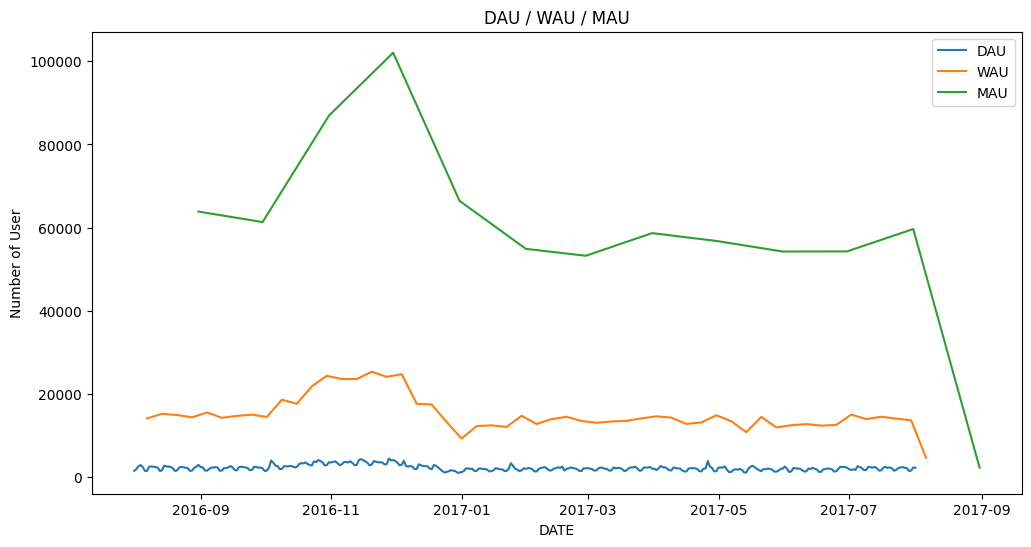

In [177]:
dau = df3.groupby(df3['new_date'])['fullVisitorId'].nunique()
wau = df3.groupby(df3['new_date'].dt.to_period('W'))['fullVisitorId'].nunique()
mau = df3.groupby(df3['new_date'].dt.to_period('M'))['fullVisitorId'].nunique()

plt.figure(figsize=(12,6))
plt.plot(dau, label = 'DAU')
plt.plot(wau, label = 'WAU')
plt.plot(mau, label = 'MAU')
plt.xlabel('DATE')
plt.ylabel('Number of User')
plt.title('DAU / WAU / MAU')
plt.legend()
plt.show()

### 요일/시간대별 사용자 heatmap

In [178]:
#요일별, 시간대별 사용자수 구하기
week_hour_user = df3.groupby([df3['new_visitStartTime'].dt.hour, df3['new_visitStartTime'].dt.weekday])['fullVisitorId'].nunique()

# 히트맵을 그리기위한 피벗테이블
# unstack은 다중 인덱스를 가진 데이터프레임을 사용할 때 하나의 인덱스를 컬럼으로 변환할 수 있음
week_hour_user = week_hour_user.unstack()
week_hour_user

new_visitStartTime,0,1,2,3,4,5,6
new_visitStartTime,,,,,,,
0,3981,4403,4463,4490,4408,3692,3421
1,3936,4553,4597,4498,4407,3578,3337
2,4081,4421,4594,4565,4496,3582,3265
3,4569,4648,4908,4710,4842,4125,3443
4,4305,4551,4946,4777,4529,3636,3281
5,4475,4705,4911,4639,4493,3450,3271
6,4336,4446,4580,4697,4326,3614,3288
7,4727,4961,5011,4922,4594,3770,3460
8,5322,5705,5688,5667,5189,4190,3854


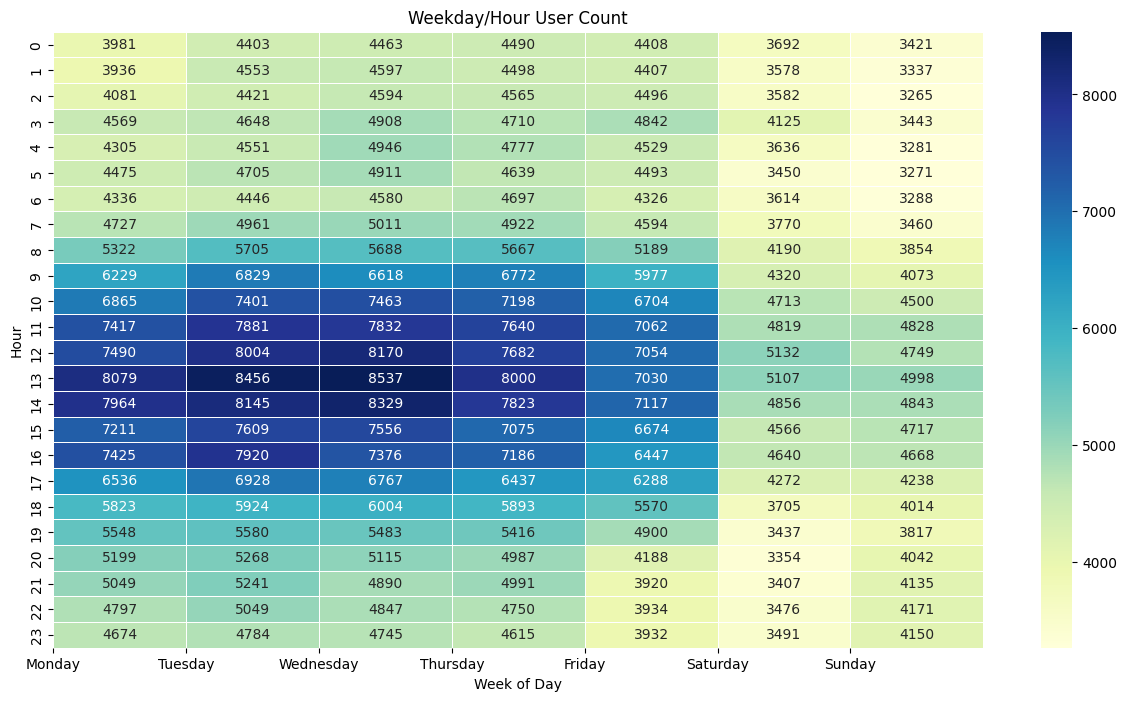

In [179]:
# heatmap그리기
plt.figure(figsize=(15, 8))
sns.heatmap(data = week_hour_user, cmap='YlGnBu', annot = True, fmt = 'd', linewidths=0.5)
plt.title('Weekday/Hour User Count')
plt.xlabel('Week of Day')
plt.ylabel('Hour')
plt.xticks(ticks=np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In [180]:
df3['continent'].unique()

array(['Asia', 'Oceania', 'Europe', 'Americas', 'Africa', '(not set)'],
      dtype=object)

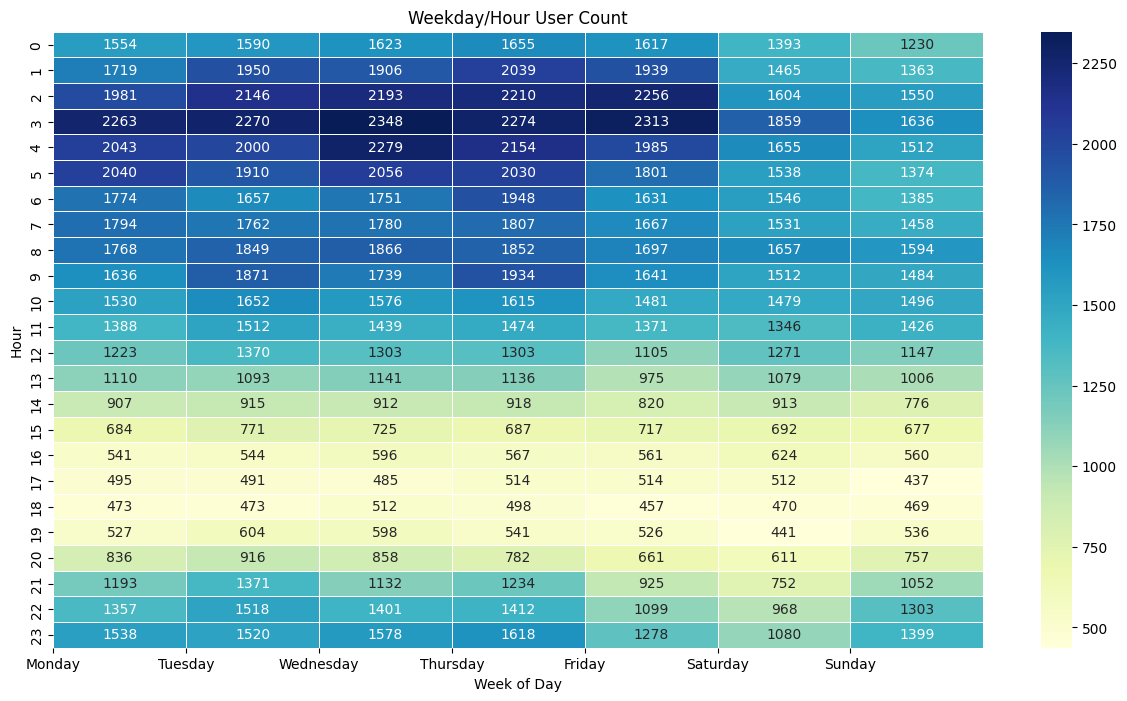

In [181]:
# 아시아
df3_asia = df3[df3['continent']== 'Asia']
df3_asia.head(3)

#요일별, 시간대별 사용자수 구하기
week_hour_user_asia = df3_asia.groupby([df3['new_visitStartTime'].dt.hour, df3['new_visitStartTime'].dt.weekday])['fullVisitorId'].nunique()

# 히트맵을 그리기위한 피벗테이블
# unstack은 다중 인덱스를 가진 데이터프레임을 사용할 때 하나의 인덱스를 컬럼으로 변환할 수 있음
week_hour_user_asia = week_hour_user_asia.unstack()
week_hour_user_asia

# heatmap그리기
plt.figure(figsize=(15, 8))
sns.heatmap(data = week_hour_user_asia, cmap='YlGnBu', annot = True, fmt = 'd', linewidths=0.5)
plt.title('Weekday/Hour User Count')
plt.xlabel('Week of Day')
plt.ylabel('Hour')
plt.xticks(ticks=np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

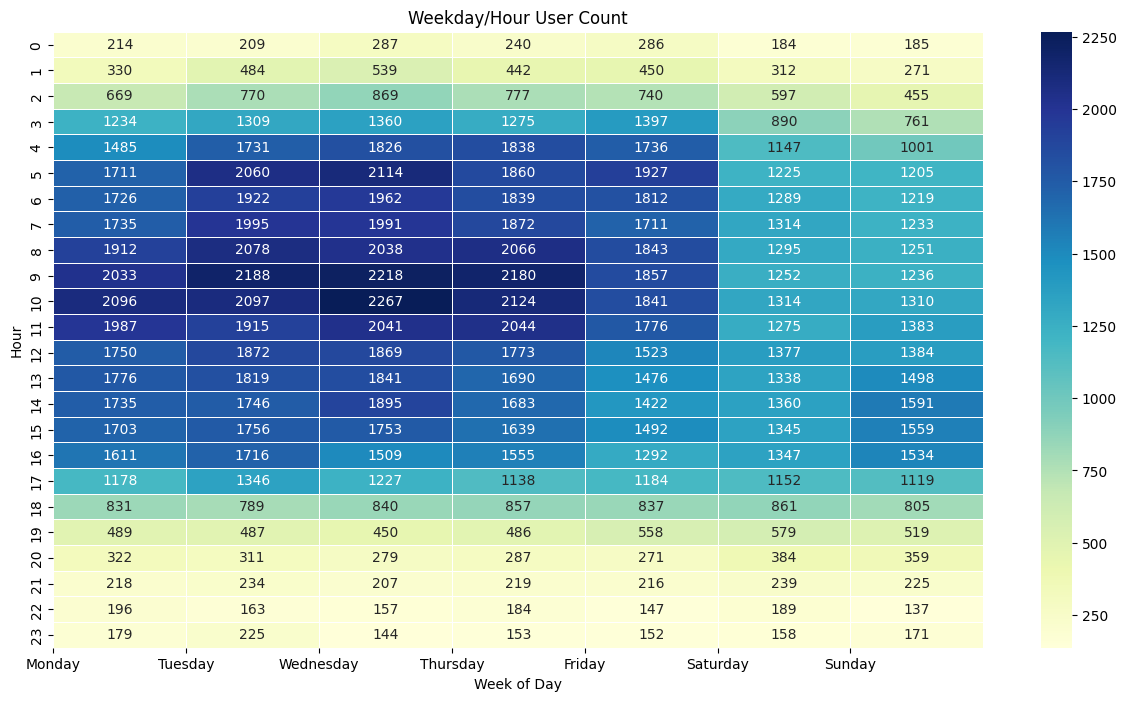

In [182]:
# 유럽
df3_europe = df3[df3['continent']== 'Europe']

#요일별, 시간대별 사용자수 구하기
week_hour_user_europe = df3_europe.groupby([df3['new_visitStartTime'].dt.hour, df3['new_visitStartTime'].dt.weekday])['fullVisitorId'].nunique()

# 히트맵을 그리기위한 피벗테이블
# unstack은 다중 인덱스를 가진 데이터프레임을 사용할 때 하나의 인덱스를 컬럼으로 변환할 수 있음
week_hour_user_europe = week_hour_user_europe.unstack()
week_hour_user_europe

# heatmap그리기
plt.figure(figsize=(15, 8))
sns.heatmap(data = week_hour_user_europe, cmap='YlGnBu', annot = True, fmt = 'd', linewidths=0.5)
plt.title('Weekday/Hour User Count')
plt.xlabel('Week of Day')
plt.ylabel('Hour')
plt.xticks(ticks=np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

### 구매와 유입채널 분석
    - 구매하지 않은 고객 : organic search > social > direct 
    - 구매한 고객 : referral > organic search > direct

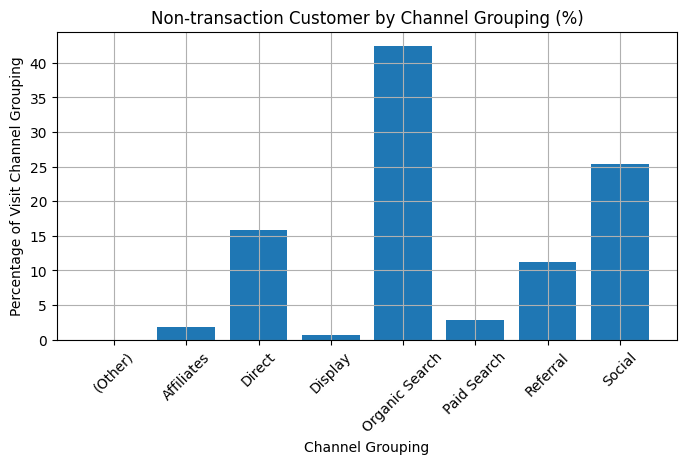

In [183]:
# transactionRevenue가 0인 행 필터링
not_purchased_customer = df3[df3['transactionRevenue'] == 0]

# 'channelGrouping'을 기준으로 그룹화하여 해당 그룹에 속한 행의 수를 세어서 non_transaction_customer에 저장
non_transaction_customer = not_purchased_customer.groupby('channelGrouping').size()

# 백분율 계산
non_transaction_total_visits = non_transaction_customer.sum()
non_transaction_percentage = (non_transaction_customer / non_transaction_total_visits) * 100

# 그래프 그리기
plt.figure(figsize=(8, 4))
plt.bar(x = non_transaction_percentage.index, height = non_transaction_percentage)
plt.title('Non-transaction Customer by Channel Grouping (%)')
plt.xlabel('Channel Grouping')
plt.ylabel('Percentage of Visit Channel Grouping')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


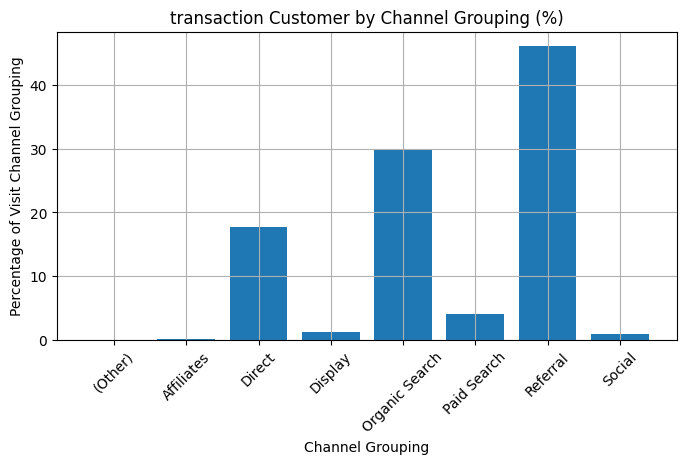

In [184]:
# transactionRevenue가 0인 행 필터링
purchased_customer = df3[df3['transactionRevenue'] > 0]

# 'channelGrouping'을 기준으로 그룹화하여 해당 그룹에 속한 행의 수를 세어서 non_transaction_customer에 저장
transaction_customer = purchased_customer.groupby('channelGrouping').size()

# 백분율 계산
transaction_total_visits = transaction_customer.sum()
transaction_percentage = (transaction_customer / transaction_total_visits) * 100

# 그래프 그리기
plt.figure(figsize=(8, 4))
plt.bar(x = transaction_percentage.index, height = transaction_percentage)
plt.title('transaction Customer by Channel Grouping (%)')
plt.xlabel('Channel Grouping')
plt.ylabel('Percentage of Visit Channel Grouping')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 잠재고객
    - 비구매고객 중 고객별 visitnumber 분포 확인

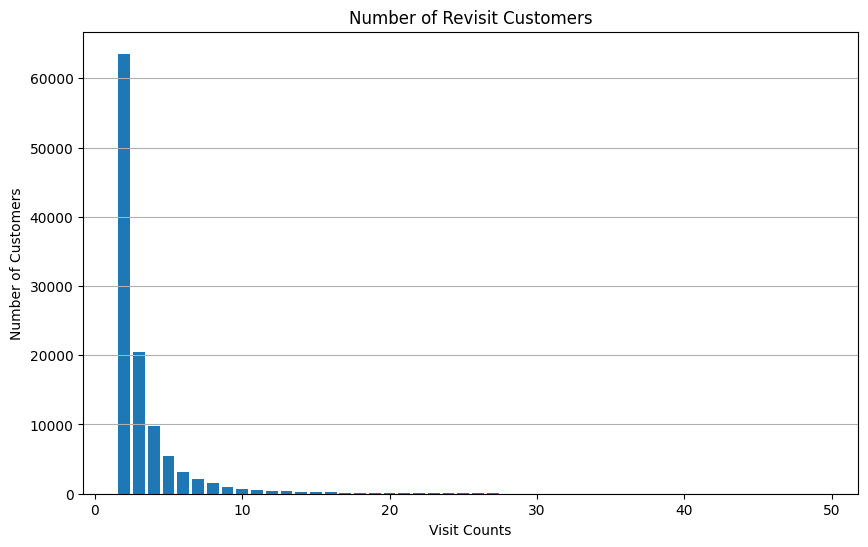

In [185]:
# 비구매고객중 재방문 고객
not_purchased_revisit_customer = not_purchased_customer.groupby('fullVisitorId')['visitNumber'].max()

# 최종 방문 횟수가 3 이상인 고객들만 선택
not_purchased_revisit_customer = not_purchased_revisit_customer[(not_purchased_revisit_customer > 1) & (not_purchased_revisit_customer < 50) ]

# 최종 방문 횟수를 그래프로 그리기
visit_counts = not_purchased_revisit_customer.value_counts().sort_index()
x = visit_counts.index
y = visit_counts.values

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title('Number of Revisit Customers')
plt.xlabel('Visit Counts')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## 매출 EDA

### 매출 추이
    - 매출의 성장 또는 감소 패턴 확인

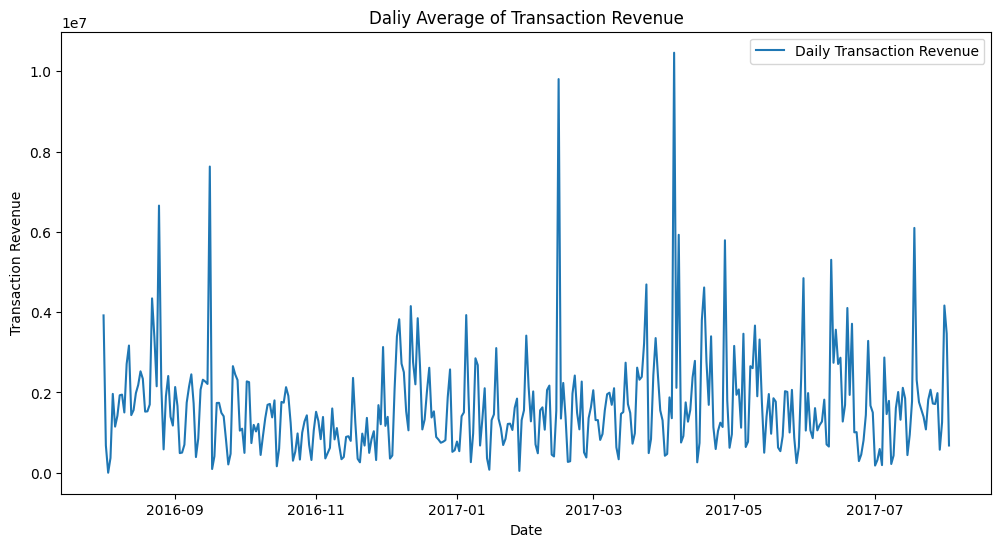

In [186]:
# 일자별 평균 매출액
daily_avg_revenue = pd.DataFrame(df3.groupby(df3['new_visitStartTime'].dt.date)['transactionRevenue'].mean())

# 일별 평균 매출액 추이
plt.figure(figsize = (12, 6))
plt.plot(daily_avg_revenue,  label = 'Daily Transaction Revenue')
plt.xlabel('Date')
plt.ylabel('Transaction Revenue')
plt.title('Daliy Average of Transaction Revenue')
plt.legend()
plt.show()


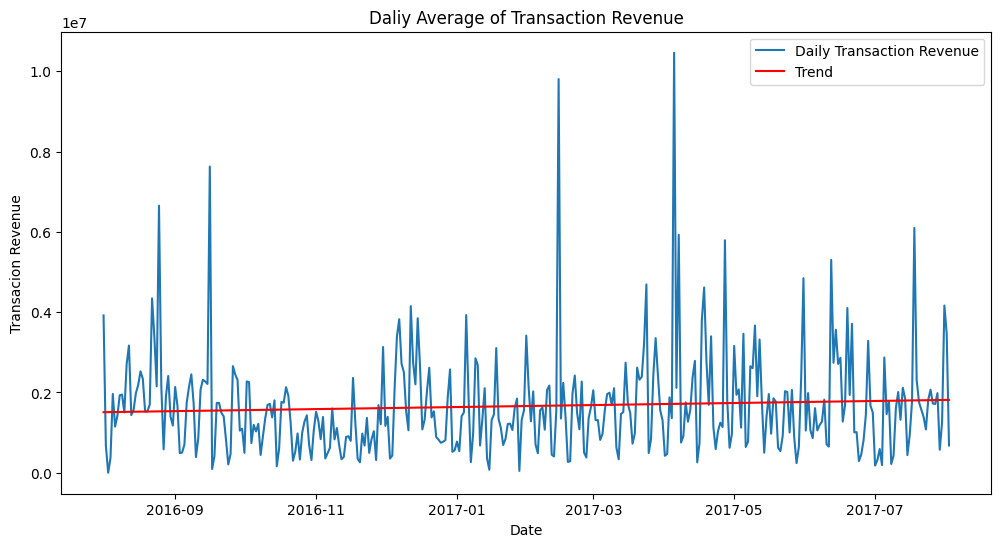

In [187]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 선형 회귀 모델을 사용하여 추세선 계산
model = LinearRegression().fit(np.arange(len(daily_avg_revenue)).reshape(-1, 1), daily_avg_revenue.values)

# 추세선을 위한 예측 값 계산
trend = model.predict(np.arange(len(daily_avg_revenue)).reshape(-1, 1))

# 이동 평균과 함께 추세선 그리기
plt.figure(figsize=(12, 6))  # 그래프 영역의 크기를 설정함
plt.plot(daily_avg_revenue.index, daily_avg_revenue.values, label='Daily Transaction Revenue') 
plt.plot(daily_avg_revenue.index, trend, label='Trend', color='red')  
plt.title('Daliy Average of Transaction Revenue')  
plt.xlabel('Date')
plt.ylabel('Transacion Revenue')  
plt.legend()  
plt.show() 

### 유입경로별 매출

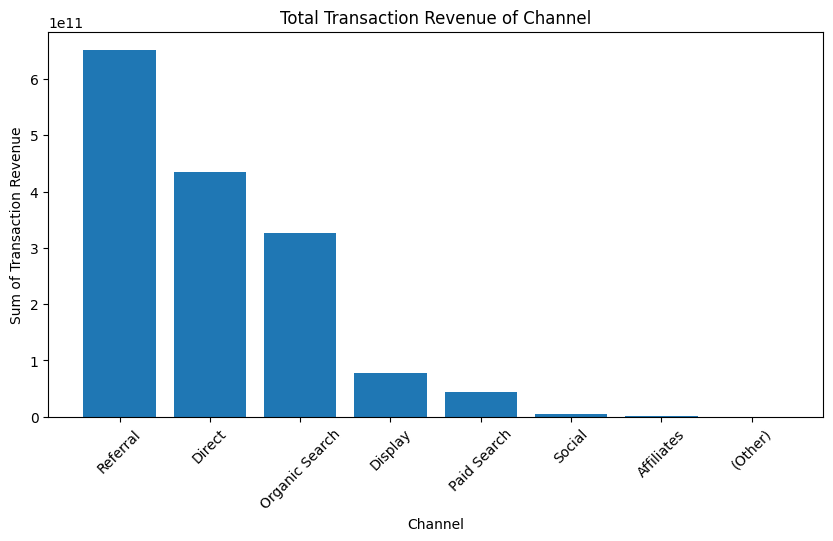

In [188]:
#채널별 매출액 내림차순 정렬
channel_revenue = df3.groupby('channelGrouping')['transactionRevenue'].sum().sort_values(ascending = False)

plt.figure(figsize = (10, 5))
plt.bar(channel_revenue.index, height = channel_revenue.values )
plt.xticks(rotation=45)
plt.title('Total Transaction Revenue of Channel')
plt.xlabel('Channel')
plt.ylabel('Sum of Transaction Revenue')
plt.show()


### 시간대별 매출

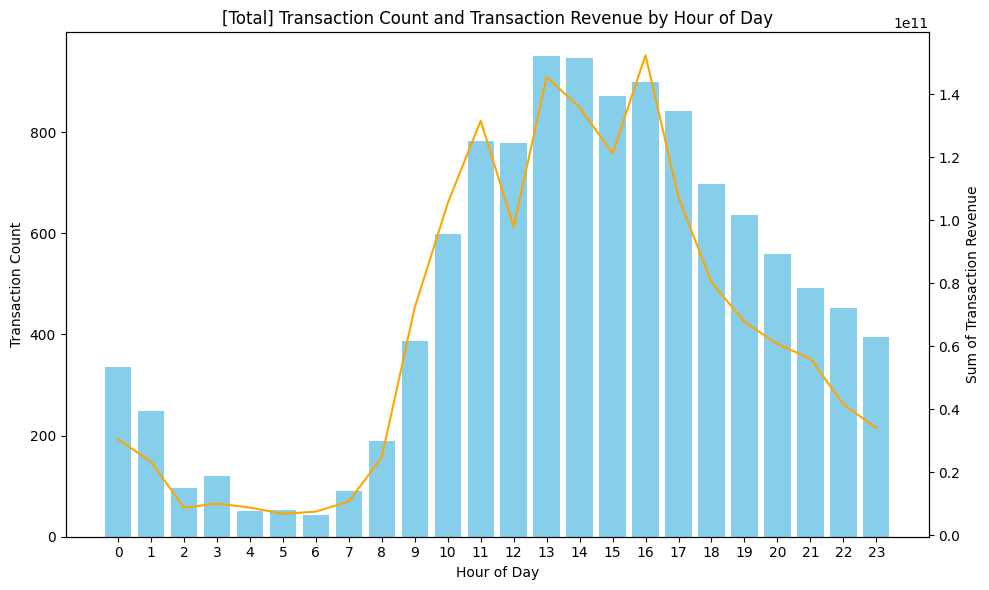

In [192]:
# 구매한 고객
purchased_customer = df3[df3['transactionRevenue'] > 0]

# 시간대별 구매건수 & 합계
transaction_count_sum = purchased_customer.groupby(purchased_customer['new_visitStartTime'].dt.hour)['transactionRevenue'].agg(['count','sum'])

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 거래 수 막대 그래프 (왼쪽 축 사용)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Transaction Count')
ax1.bar(transaction_count_sum.index, transaction_count_sum['count'], color = 'skyblue')

# 새로운 오른쪽 축 생성
ax2 = ax1.twinx()

# 거래 수익 선 그래프 (오른쪽 축 사용)
ax2.set_ylabel('Sum of Transaction Revenue')
ax2.plot(transaction_count_sum.index, transaction_count_sum['sum'],  color = 'orange')

# x축 모든 눈금 표시
plt.xticks(transaction_count_sum.index) 

# 그래프 제목
plt.title('[Total] Transaction Count and Transaction Revenue by Hour of Day')

# 그래프 표시
plt.tight_layout()
plt.show()

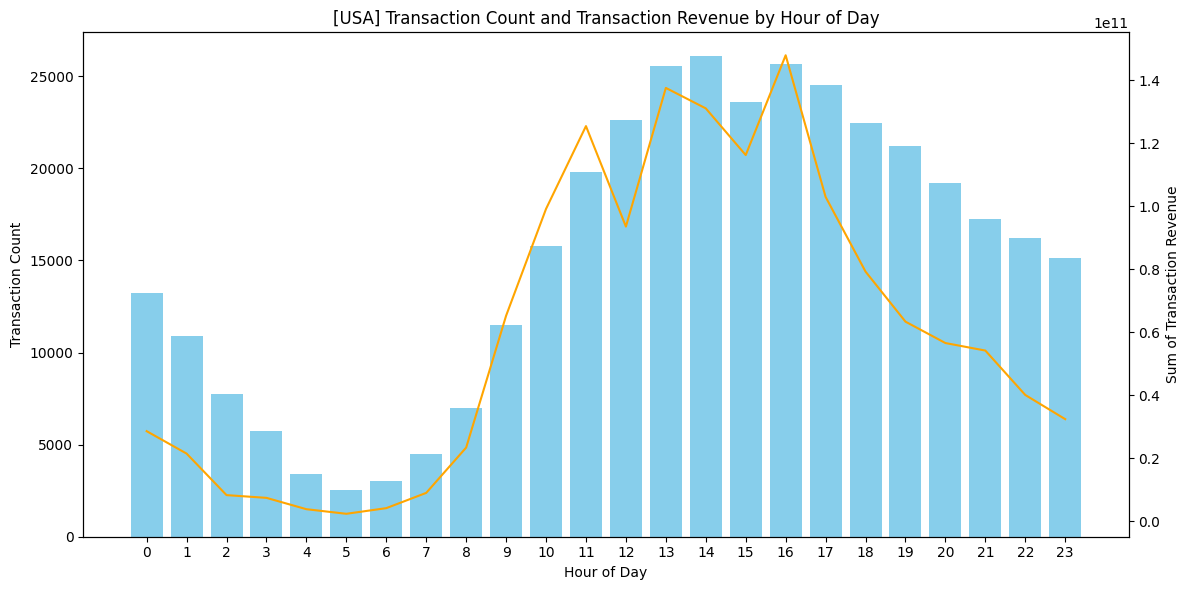

In [193]:
#미국
purchased_customer_usa = df3[df3['country']== 'United States']
transaction_count_sum_usa = purchased_customer_usa.groupby(purchased_customer_usa['new_visitStartTime'].dt.hour)['transactionRevenue'].agg(['count','sum'])

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Transaction Count')
ax1.bar(transaction_count_sum_usa.index, transaction_count_sum_usa['count'], color = 'skyblue')
ax2 = ax1.twinx()
ax2.set_ylabel('Sum of Transaction Revenue')
ax2.plot(transaction_count_sum_usa.index, transaction_count_sum_usa['sum'],  color = 'orange')
plt.xticks(transaction_count_sum_usa.index) 
plt.title('[USA] Transaction Count and Transaction Revenue by Hour of Day')
plt.tight_layout()
plt.show()

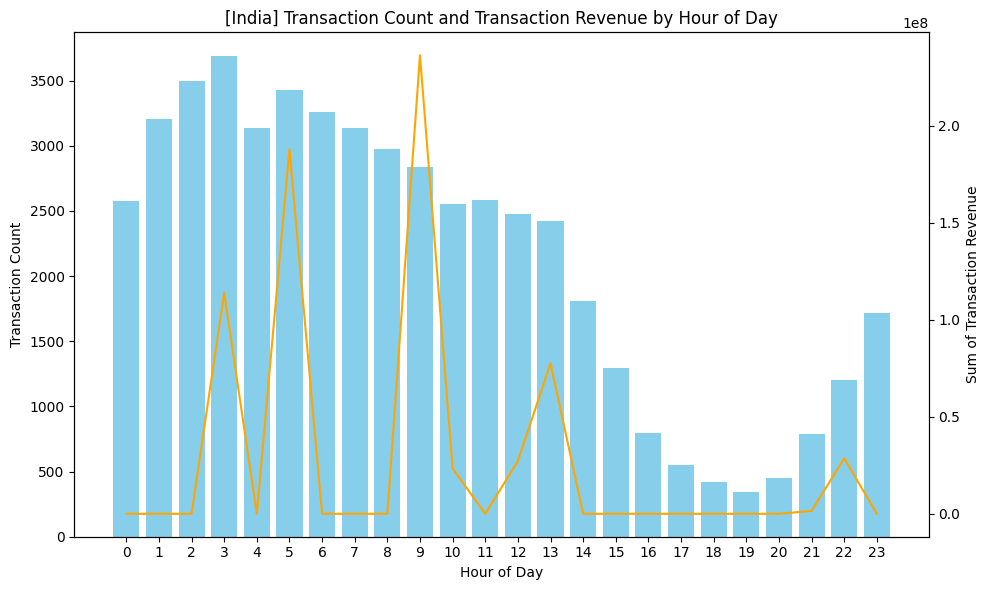

In [194]:
#인도
purchased_customer_india = df3[df3['country']== 'India']
transaction_count_sum_india = purchased_customer_india.groupby(purchased_customer_india['new_visitStartTime'].dt.hour)['transactionRevenue'].agg(['count','sum'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Transaction Count')
ax1.bar(transaction_count_sum_india.index, transaction_count_sum_india['count'], color = 'skyblue')
ax2 = ax1.twinx()
ax2.set_ylabel('Sum of Transaction Revenue')
ax2.plot(transaction_count_sum_india.index, transaction_count_sum_india['sum'],  color = 'orange')
plt.xticks(transaction_count_sum_india.index) 
plt.title('[India] Transaction Count and Transaction Revenue by Hour of Day')
plt.tight_layout()
plt.show()

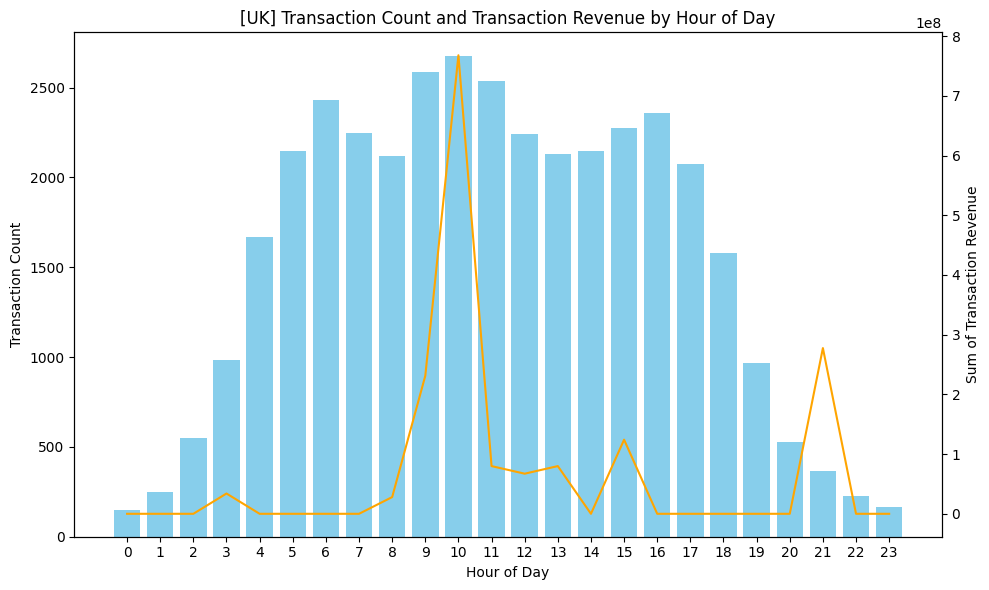

In [195]:
#영국
purchased_customer_uk = df3[df3['country']== 'United Kingdom']
transaction_count_sum_uk = purchased_customer_uk.groupby(purchased_customer_uk['new_visitStartTime'].dt.hour)['transactionRevenue'].agg(['count','sum'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Transaction Count')
ax1.bar(transaction_count_sum_uk.index, transaction_count_sum_uk['count'], color = 'skyblue')
ax2 = ax1.twinx()
ax2.set_ylabel('Sum of Transaction Revenue')
ax2.plot(transaction_count_sum_uk.index, transaction_count_sum_uk['sum'],  color = 'orange')
plt.xticks(transaction_count_sum_uk.index) 
plt.title('[UK] Transaction Count and Transaction Revenue by Hour of Day')
plt.tight_layout()
plt.show()

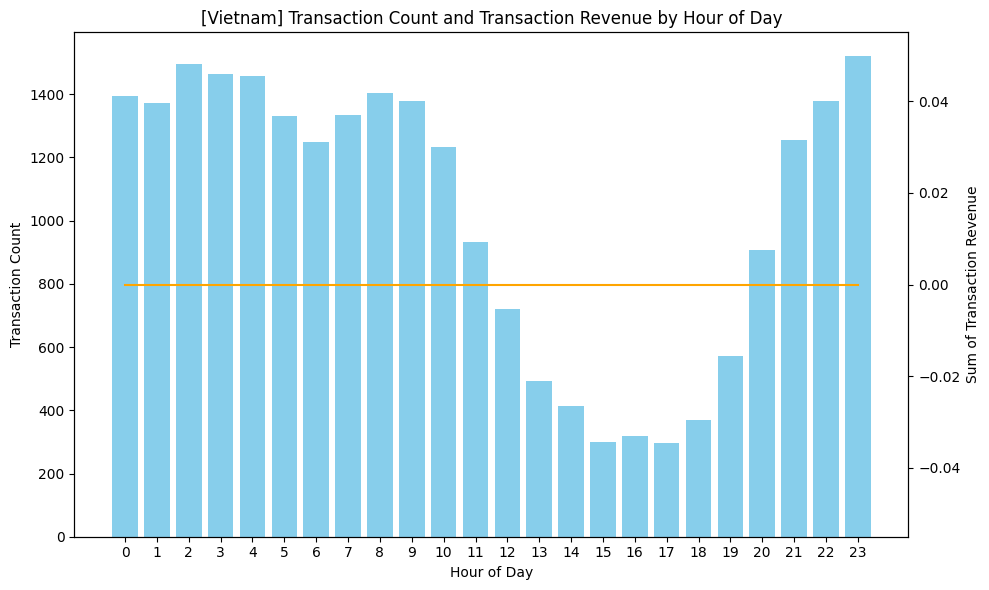

In [196]:
#베트남
purchased_customer_vietnam = df3[df3['country']== 'Vietnam']
transaction_count_sum_vietnam = purchased_customer_vietnam.groupby(purchased_customer_vietnam['new_visitStartTime'].dt.hour)['transactionRevenue'].agg(['count','sum'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Transaction Count')
ax1.bar(transaction_count_sum_vietnam.index, transaction_count_sum_vietnam['count'], color = 'skyblue')
ax2 = ax1.twinx()
ax2.set_ylabel('Sum of Transaction Revenue')
ax2.plot(transaction_count_sum_vietnam.index, transaction_count_sum_vietnam['sum'],  color = 'orange')
plt.xticks(transaction_count_sum_vietnam.index) 
plt.title('[Vietnam] Transaction Count and Transaction Revenue by Hour of Day')
plt.tight_layout()
plt.show()

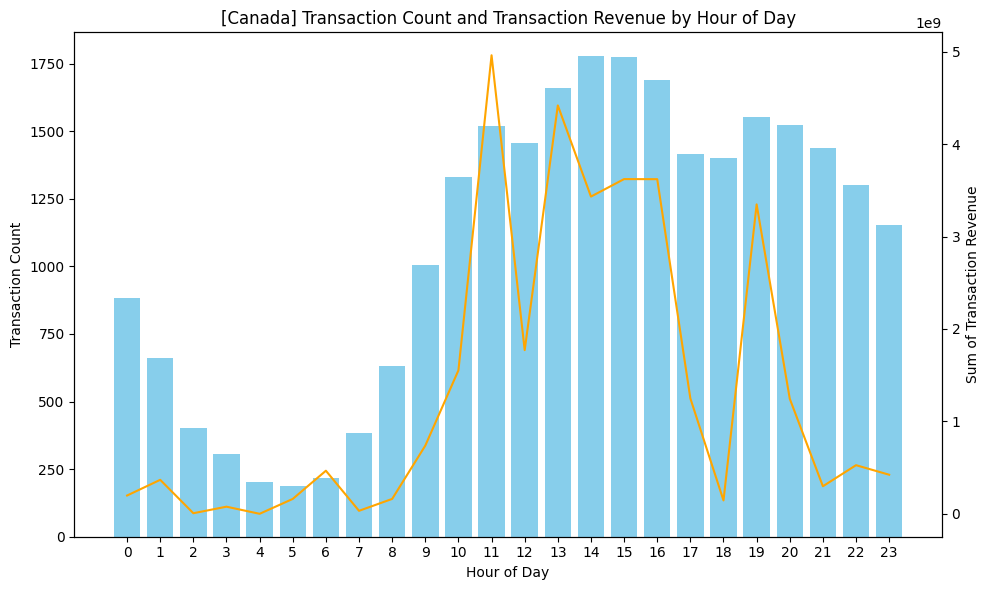

In [197]:
#캐나다
purchased_customer_canada = df3[df3['country']== 'Canada']
transaction_count_sum_canada = purchased_customer_canada.groupby(purchased_customer_canada['new_visitStartTime'].dt.hour)['transactionRevenue'].agg(['count','sum'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Transaction Count')
ax1.bar(transaction_count_sum_canada.index, transaction_count_sum_canada['count'], color = 'skyblue')
ax2 = ax1.twinx()
ax2.set_ylabel('Sum of Transaction Revenue')
ax2.plot(transaction_count_sum_canada.index, transaction_count_sum_canada['sum'],  color = 'orange')
plt.xticks(transaction_count_sum_canada.index) 
plt.title('[Canada] Transaction Count and Transaction Revenue by Hour of Day')
plt.tight_layout()
plt.show()

## 미국 EDA

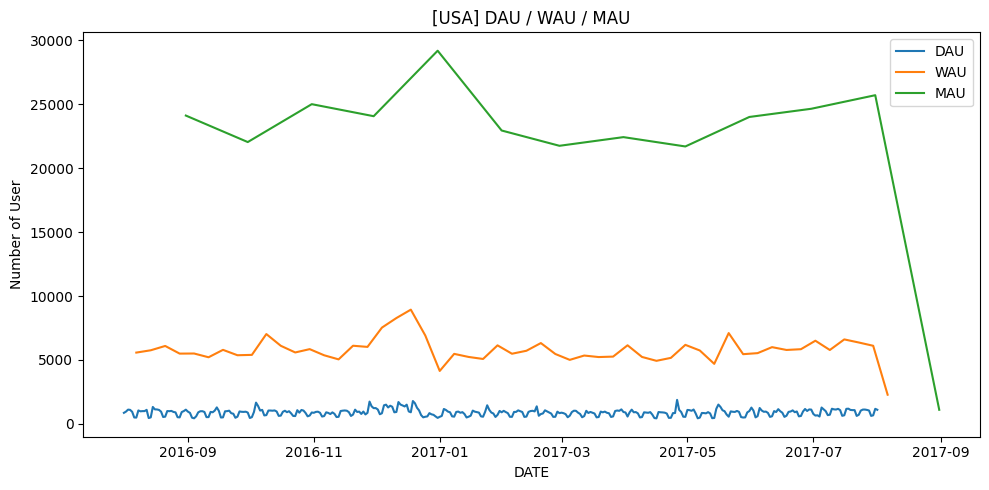

In [ ]:
df3_usa = df3[df3['country'] == 'United States'].reset_index()
#미국 시차 계산 
df3_usa['hour_of_day'] = df3_usa['hour_of_day'] - 5

dau_usa = df3_usa.groupby(df3_usa['new_date'])['fullVisitorId'].nunique()
wau_usa = df3_usa.groupby(df3_usa['new_date'].dt.to_period('W'))['fullVisitorId'].nunique()
mau_usa = df3_usa.groupby(df3_usa['new_date'].dt.to_period('M'))['fullVisitorId'].nunique()

plt.figure(figsize=(10,5))
plt.plot(dau_usa, label = 'DAU')
plt.plot(wau_usa, label = 'WAU')
plt.plot(mau_usa, label = 'MAU')
plt.xlabel('DATE')
plt.ylabel('Number of User')
plt.title('[USA] DAU / WAU / MAU')
plt.legend()
plt.tight_layout()
plt.show()

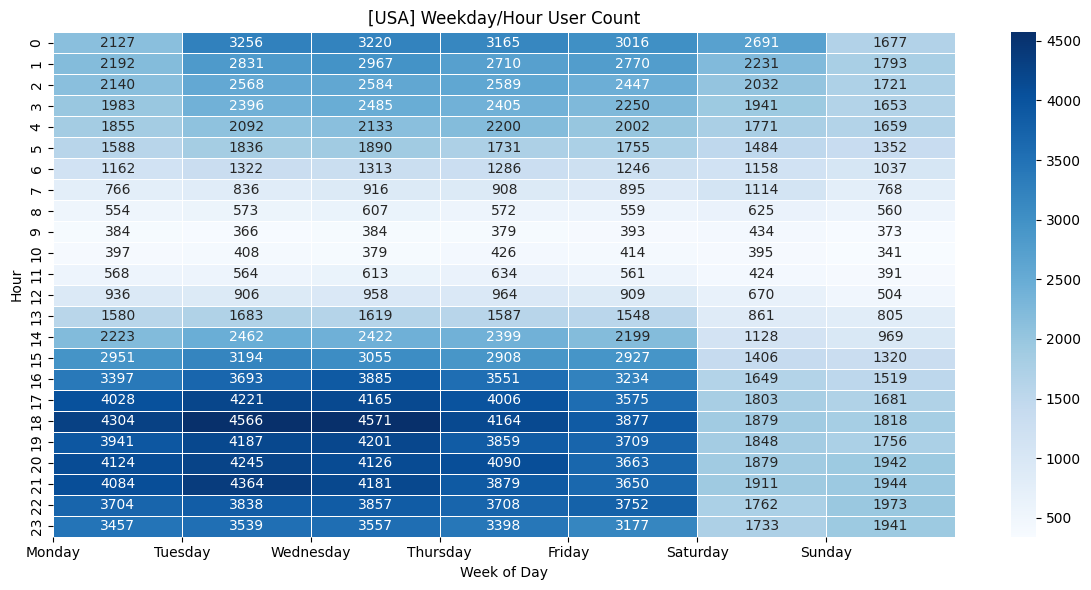

In [ ]:
#요일별, 시간대별 사용자수 구하기
week_hour_user_usa = df3_usa.groupby([df3_usa['new_visitStartTime'].dt.hour, df3_usa['new_visitStartTime'].dt.weekday])['fullVisitorId'].nunique()

# 히트맵을 그리기위한 피벗테이블
# unstack은 다중 인덱스를 가진 데이터프레임을 사용할 때 하나의 인덱스를 컬럼으로 변환할 수 있음
week_hour_user_usa = week_hour_user_usa.unstack()
week_hour_user_usa

# heatmap그리기
plt.figure(figsize=(12, 6))
sns.heatmap(data = week_hour_user_usa, cmap='Blues', annot = True, fmt = 'd', linewidths=0.5)
plt.title('[USA] Weekday/Hour User Count')
plt.xlabel('Week of Day')
plt.ylabel('Hour')
plt.tight_layout()
plt.xticks(ticks=np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

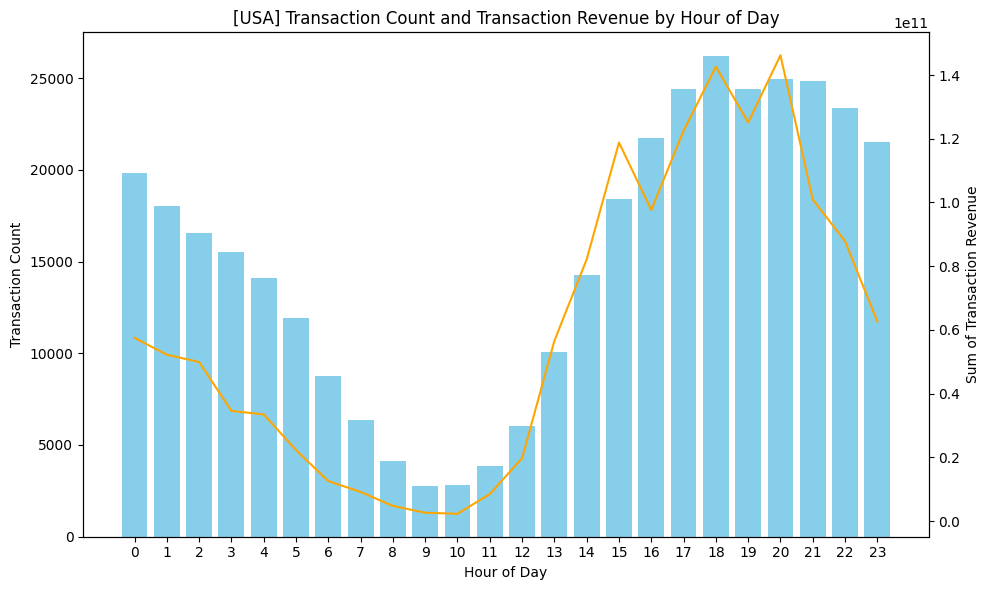

In [ ]:
#미국
purchased_customer_usa = df3[df3['country']== 'United States']
transaction_count_sum_usa = purchased_customer_usa.groupby(purchased_customer_usa['new_visitStartTime'].dt.hour)['transactionRevenue'].agg(['count','sum'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Transaction Count')
ax1.bar(transaction_count_sum_usa.index, transaction_count_sum_usa['count'], color = 'skyblue')
ax2 = ax1.twinx()
ax2.set_ylabel('Sum of Transaction Revenue')
ax2.plot(transaction_count_sum_usa.index, transaction_count_sum_usa['sum'],  color = 'orange')
plt.xticks(transaction_count_sum_usa.index) 
plt.title('[USA] Transaction Count and Transaction Revenue by Hour of Day')
plt.tight_layout()
plt.show()

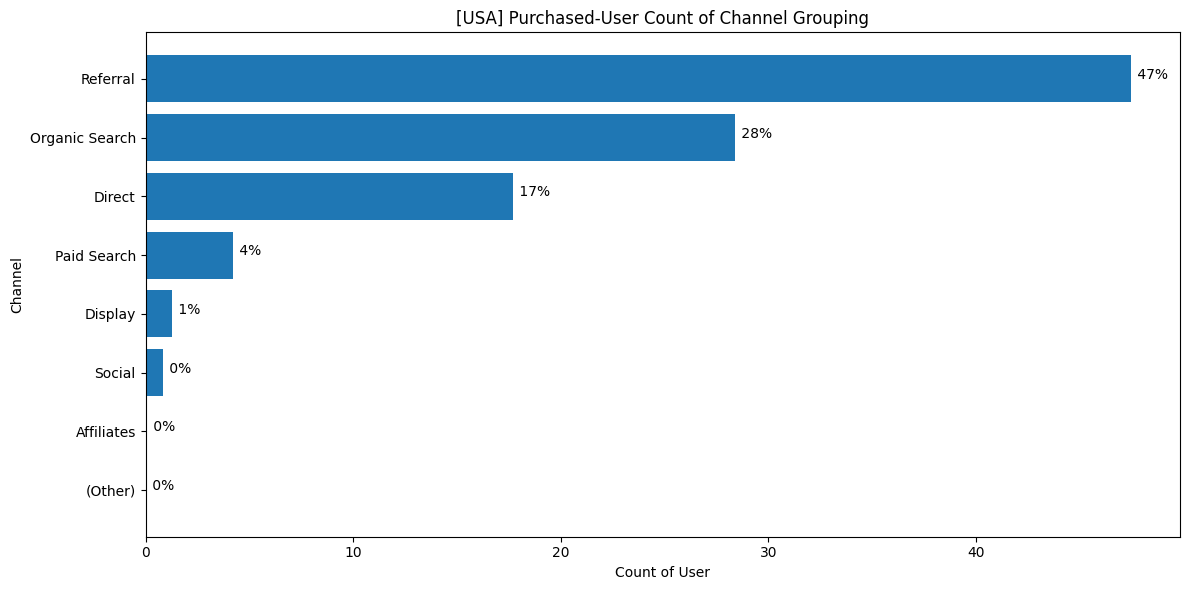

In [ ]:
usa_purchased_customer = df3_usa[df3_usa['transactionRevenue'] > 0]
usa_purchased_customer_channel = usa_purchased_customer.groupby('channelGrouping').size().sort_values()


# 백분율 계산
usa_purchased_customer_channel_sum= usa_purchased_customer_channel.sum()
usa_purchased_customer_channel_percentage = (usa_purchased_customer_channel / usa_purchased_customer_channel_sum) * 100


plt.figure(figsize = (12, 6))
plt.barh(usa_purchased_customer_channel_percentage.index, usa_purchased_customer_channel_percentage.values)
plt.title('[USA] Purchased-User Count of Channel Grouping')
plt.xlabel('Count of User')
plt.ylabel('Channel')
for index, value in enumerate(usa_purchased_customer_channel_percentage.values):
    plt.text(value +0.1, index, f' {int(value)}%')
plt.tight_layout()
plt.show()

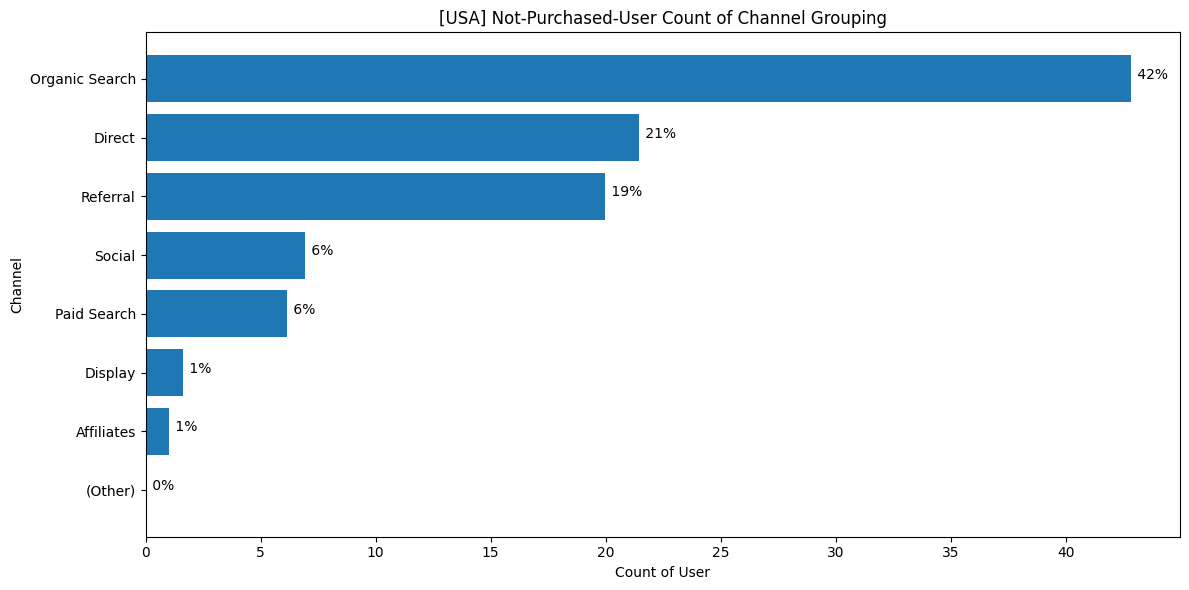

In [ ]:
usa_not_purchased_customer = df3_usa[df3_usa['transactionRevenue'] == 0]
usa_not_purchased_customer_channel = usa_not_purchased_customer.groupby('channelGrouping').size().sort_values()

# 백분율 계산
usa_not_purchased_customer_channel_sum = usa_not_purchased_customer_channel.sum()
usa_not_purchased_customer_channel_percentage = (usa_not_purchased_customer_channel / usa_not_purchased_customer_channel_sum) * 100


plt.figure(figsize = (12, 6))
plt.barh(usa_not_purchased_customer_channel_percentage.index, usa_not_purchased_customer_channel_percentage.values)
plt.title('[USA] Not-Purchased-User Count of Channel Grouping')
plt.xlabel('Count of User')
plt.ylabel('Channel')
for index, value in enumerate(usa_not_purchased_customer_channel_percentage.values):
    plt.text(value +0.1, index, f' {int(value)}%')
plt.tight_layout()
plt.show()

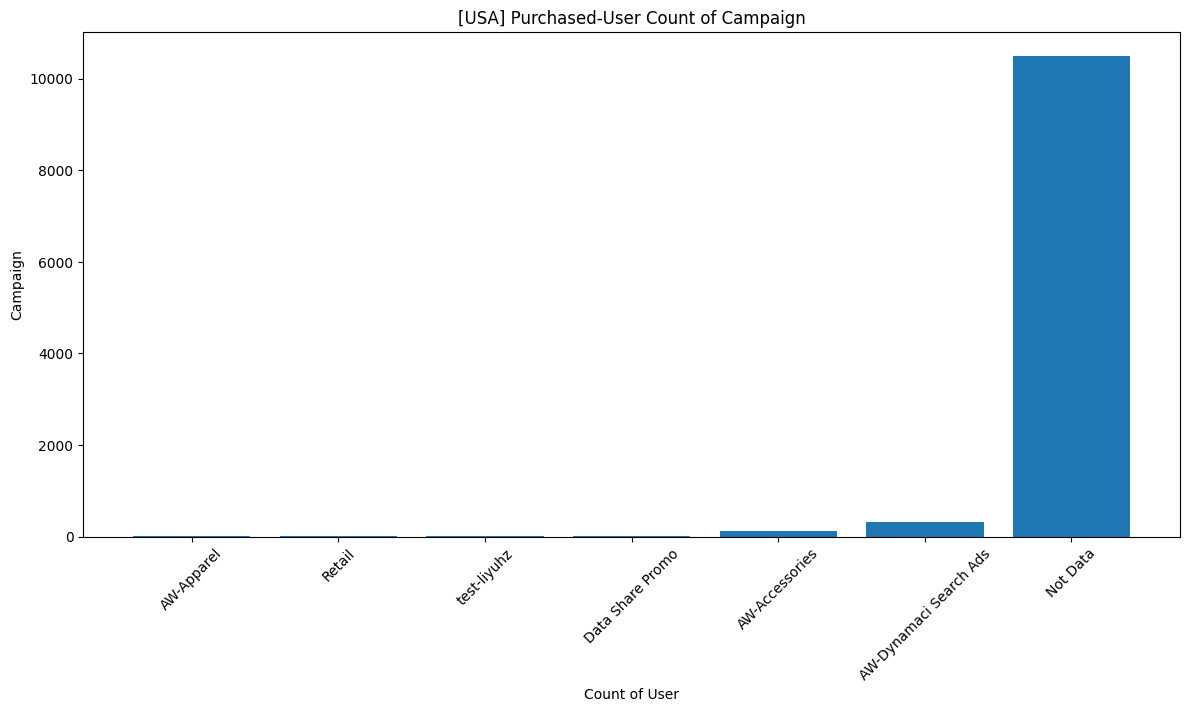

In [ ]:
usa_purchased_customer = df3_usa[df3_usa['transactionRevenue'] > 0]
usa_purchased_customer_campaign = usa_purchased_customer.groupby('campaign').size().sort_values()

usa_purchased_customer_campaign.index = ['AW-Apparel', 'Retail', 'test-liyuhz','Data Share Promo', 'AW-Accessories','AW-Dynamaci Search Ads','Not Data']

plt.figure(figsize = (12, 6))
plt.bar(usa_purchased_customer_campaign.index, usa_purchased_customer_campaign.values)
plt.title('[USA] Purchased-User Count of Campaign')
plt.xlabel('Count of User')
plt.ylabel('Campaign')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

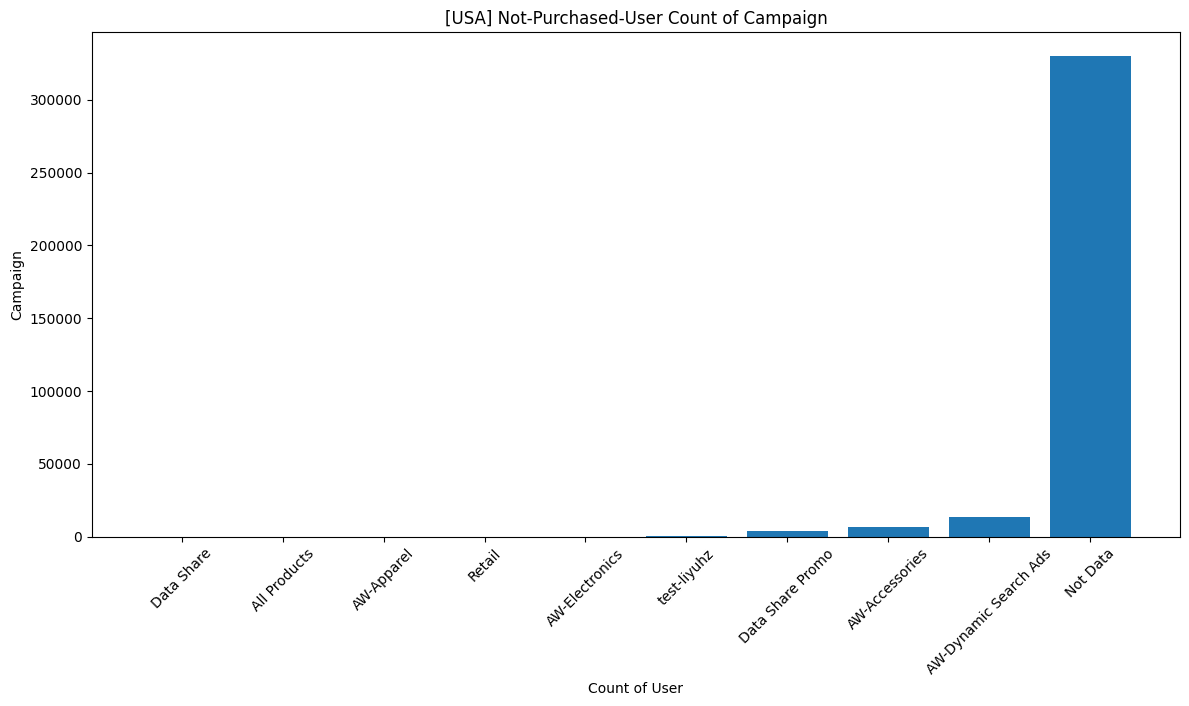

In [ ]:
usa_not_purchased_customer = df3_usa[df3_usa['transactionRevenue'] == 0]
usa_not_purchased_customer_campaign = usa_not_purchased_customer.groupby('campaign').size().sort_values()


usa_not_purchased_customer_campaign.index = ['Data Share', 'All Products', 'AW-Apparel','Retail', 'AW-Electronics', 'test-liyuhz','Data Share Promo', 'AW-Accessories', 'AW-Dynamic Search Ads', 'Not Data']

plt.figure(figsize = (12, 6))
plt.bar(usa_not_purchased_customer_campaign.index, usa_not_purchased_customer_campaign.values)
plt.title('[USA] Not-Purchased-User Count of Campaign')
plt.xlabel('Count of User')
plt.ylabel('Campaign')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [ ]:
trafficsource_df2

,campaign,source,medium,keyword
0,(not set),google,organic,(not provided)
1,(not set),google,organic,(not provided)
2,(not set),google,organic,(not provided)
3,(not set),google,organic,google + online
4,(not set),google,organic,(not provided)
...,...,...,...,...
903648,(not set),youtube.com,referral,NaN
903649,(not set),youtube.com,referral,NaN
903650,(not set),youtube.com,referral,NaN
903651,(not set),facebook.com,referral,NaN


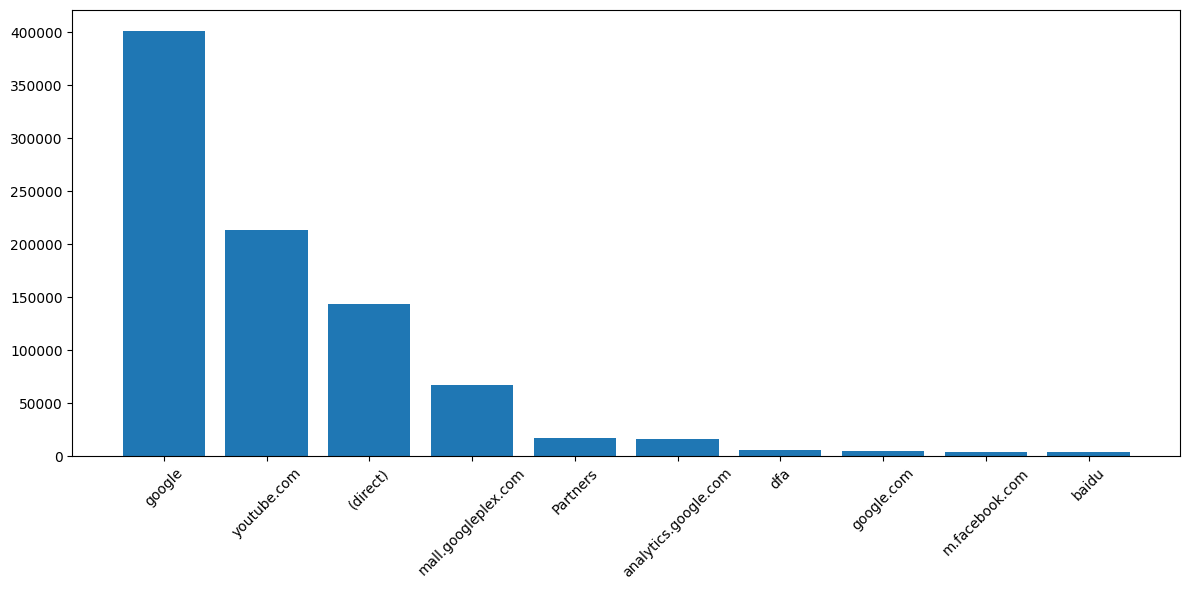

In [ ]:
trafficsource_df2_source = trafficsource_df2.groupby('source').size().sort_values(ascending=False).head(10)
trafficsource_df2_source

plt.figure(figsize = (12, 5))
plt.bar(trafficsource_df2_source.index, trafficsource_df2_source.values)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

<BarContainer object of 7 artists>

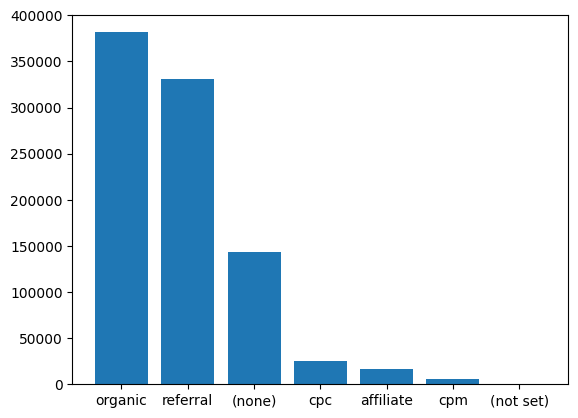

In [ ]:
trafficsource_df2_source = trafficsource_df2.groupby('medium').size().sort_values(ascending=False)
trafficsource_df2_source

plt.bar(trafficsource_df2_source.index, trafficsource_df2_source.values)

In [ ]:
# 백분율 계산
usa_purchased_customer_channel_sum= usa_purchased_customer_channel.sum()
usa_purchased_customer_channel_percentage = (usa_purchased_customer_channel / usa_purchased_customer_channel_sum) * 100


plt.figure(figsize = (12, 6))
plt.barh(usa_purchased_customer_channel_percentage.index, usa_purchased_customer_channel_percentage.values)
plt.title('[USA] Purchased-User Count of Channel Grouping')
plt.xlabel('Count of User')
plt.ylabel('Channel')
for index, value in enumerate(usa_purchased_customer_channel_percentage.values):
    plt.text(value +0.1, index, f' {int(value)}%')
plt.tight_layout()
plt.show()

## 이탈 EDA

### 구매여부별 고객 재방문률
    - bounces = 1 : 이탈
    - 구매이력이 없는 고객의 재방문율, 유입채널을 분석해 마케팅 효율성 평가해봄
    - 최초구매의 평균 방문횟수 파악하여 구매전환 유도

In [ ]:
# 고객별 매출, 방문횟수, 이탈률
customer_revenue_visit = df3.groupby('fullVisitorId')[['transactionRevenue', 'visitNumber', 'bounces']].agg({'transactionRevenue':'sum', 'visitNumber' :'max','bounces' :'mean'})

#구매이력이 없는 고객
non_buy_customer = customer_revenue_visit[customer_revenue_visit['transactionRevenue']==0]

#구매이력이 있는 고객
buy_customer = customer_revenue_visit[customer_revenue_visit['transactionRevenue']>0]

#구매이력별 평균방문횟수
non_buy_customer_visit_mean = non_buy_customer['visitNumber'].mean()
buy_customer_visit_mean = buy_customer['visitNumber'].mean()

#구매이력별 이탈률
non_buy_customer_bounces_rate = non_buy_customer['bounces'].mean()
buy_customer_bounces_rate = buy_customer['bounces'].mean() 


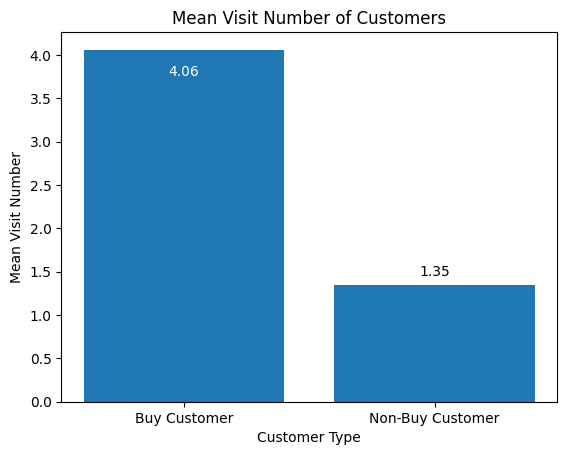

In [ ]:
# 구매이력별 평균 방문횟수 비교
plt.bar(['Buy Customer', 'Non-Buy Customer'], [buy_customer_visit_mean, non_buy_customer_visit_mean])
plt.xlabel('Customer Type')
plt.ylabel('Mean Visit Number')
plt.title('Mean Visit Number of Customers')
plt.text(1, non_buy_customer_visit_mean + 0.1, f'{non_buy_customer_visit_mean:.2f}', ha = 'center')
plt.text(0, buy_customer_visit_mean -0.3, f'{buy_customer_visit_mean:.2f}', ha='center', color = 'white')
plt.show()

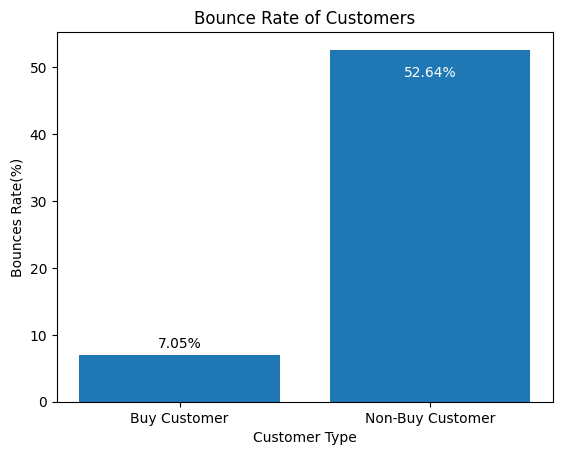

In [ ]:
#구매이력별 이탈률 그래프
plt.bar(['Buy Customer', 'Non-Buy Customer'], [buy_customer_bounces_rate*100, non_buy_customer_bounces_rate*100,])
plt.xlabel('Customer Type')
plt.ylabel('Bounces Rate(%)')
plt.title('Bounce Rate of Customers')
plt.text(0, buy_customer_bounces_rate*100+1, f'{buy_customer_bounces_rate*100:.2f}%', ha='center')
plt.text(1, non_buy_customer_bounces_rate*100-4, f'{non_buy_customer_bounces_rate*100:.2f}%', ha = 'center', color = 'white')
plt.show()


### 재방문률 구하기

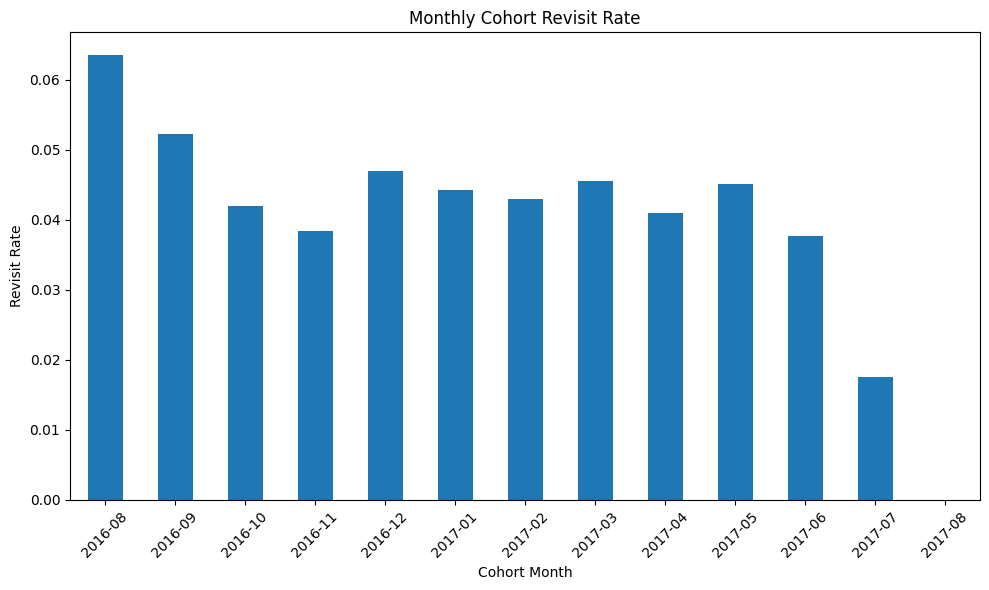

In [ ]:
# 고객별로 처음 방문한 날짜 계산
first_visit_date = df3.groupby('fullVisitorId')['new_visitStartTime'].min()

# 각 고객이 속한 코호트 계산 (첫 방문한 월)
first_visit_month = first_visit_date.dt.to_period('M')

# 코호트별로 데이터프레임 생성
cohort_df = pd.DataFrame({'first_visit_month': first_visit_month})
cohort_df['revisited'] = (df3.groupby('fullVisitorId')['new_visitStartTime'].max() - df3.groupby('fullVisitorId')['new_visitStartTime'].min()) > pd.to_timedelta('7 days')

# 각 코호트의 월별 재방문률 계산
cohort_revisit_rate = cohort_df.groupby('first_visit_month')['revisited'].mean()

# 차트 그리기
cohort_revisit_rate.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cohort Month')
plt.ylabel('Revisit Rate')
plt.title('Monthly Cohort Revisit Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()